In [2]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
import seaborn as sns
# # 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import folium
import json

plt.rc("font", family="AppleGothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

python 3.10.13 (main, Mar 12 2024, 15:59:23) [Clang 15.0.0 (clang-1500.1.0.2.5)]
numpy 1.24.0
pandas 2.2.3
matplotlib 3.8.3


# add_subplot

## add_subplot() 예제1

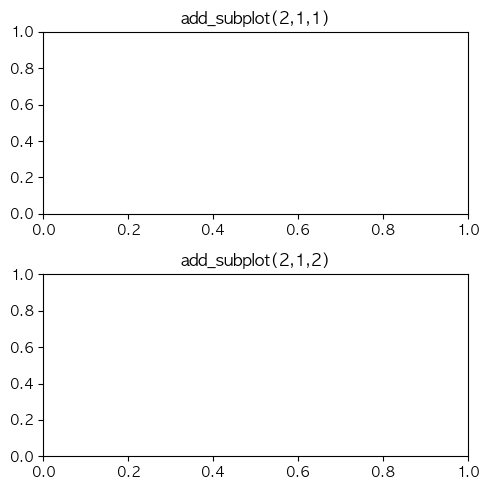

In [3]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax1=fig.add_subplot(2,1,1)
_=ax1.set_title('add_subplot(2,1,1)')
ax2=fig.add_subplot(2,1,2)
_=ax2.set_title('add_subplot(2,1,2)')
fig.tight_layout()

## cf) subplots()

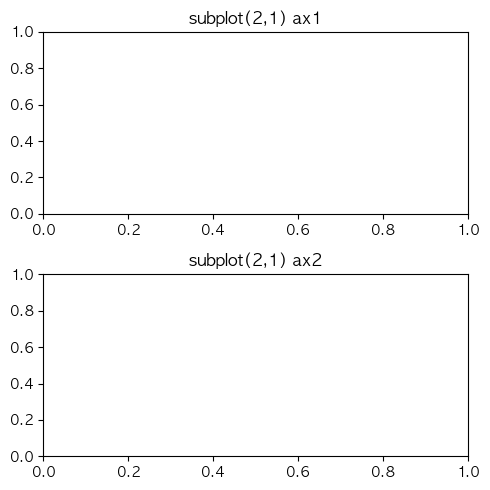

In [4]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax1, ax2=fig.subplots(2,1)
_=ax1.set_title('subplot(2,1) ax1')
_=ax2.set_title('subplot(2,1) ax2')
fig.tight_layout()

## add_subplot() 예제2

Text(0.5, 1.0, 'add_subplot(2,2,1)')

Text(0.5, 1.0, 'add_subplot(2,2,4)')

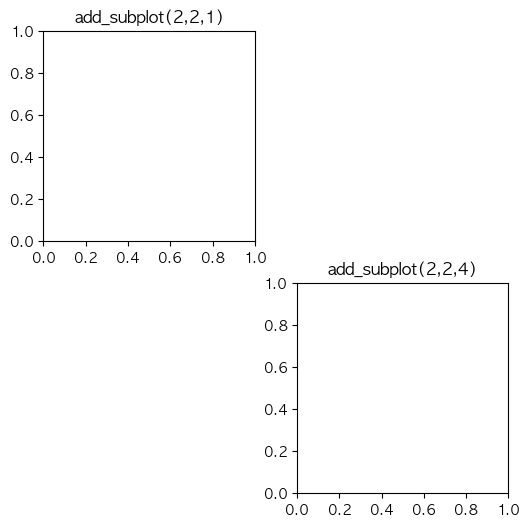

In [5]:
fig=plt.figure(figsize=(6,6), dpi=100)
ax1=fig.add_subplot(2,2,1)
ax1.set_title('add_subplot(2,2,1)')
ax2=fig.add_subplot(2,2,4)
ax2.set_title('add_subplot(2,2,4)')

## add_subplot() 예제3

Text(0.5, 1.0, 'add_subplot(2,2,1)')

Text(0.5, 1.0, 'add_subplot(2,2,3)')

Text(0.5, 1.0, 'add_subplot(1,2,2)')

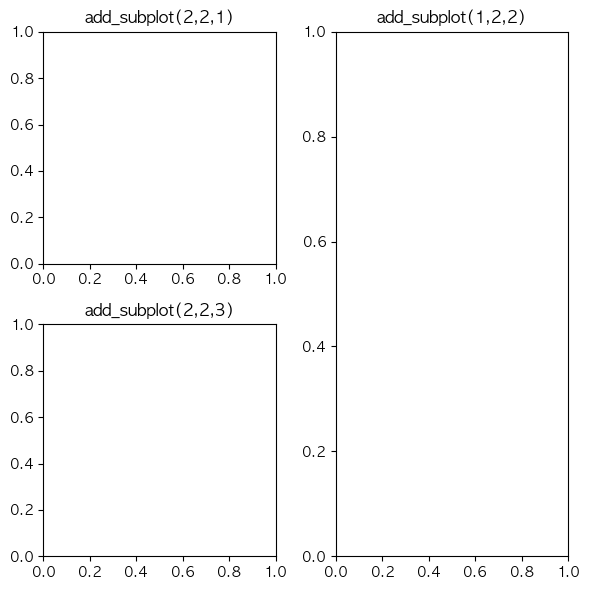

In [7]:
fig=plt.figure(figsize=(6,6), dpi=100)
ax1=fig.add_subplot(2,2,1)
ax1.set_title('add_subplot(2,2,1)')
ax2=fig.add_subplot(2,2,3)
ax2.set_title('add_subplot(2,2,3)')
ax3=fig.add_subplot(1,2,2)
ax3.set_title('add_subplot(1,2,2)')
fig.tight_layout()

## add_subplot() 예제4

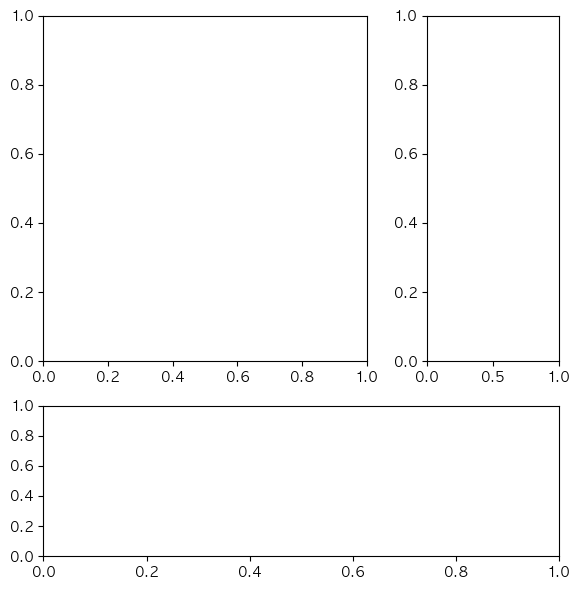

In [21]:
fig=plt.figure(figsize=(6,6), dpi=100)

ax1=fig.add_subplot(3, 3, (1, 5)) # == (2,4)
ax1=fig.add_subplot(3, 3, (7, 9))
ax1=fig.add_subplot(3, 3, (3, 6))

fig.tight_layout()

## 실습1

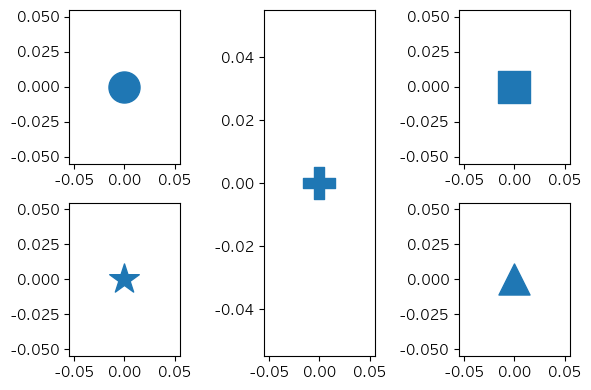

In [27]:
fig=plt.figure(figsize=(6,4), dpi=100)

## 코드작성
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,3)
ax3=fig.add_subplot(2,3,4)
ax4=fig.add_subplot(2,3,6)
ax5=fig.add_subplot(1,3,2)

_=ax1.scatter(0,0,marker='o',s=500)
_=ax2.scatter(0,0,marker='s',s=500)
_=ax3.scatter(0,0,marker='*',s=500)
_=ax4.scatter(0,0,marker='^',s=500)
_=ax5.scatter(0,0,marker='P',s=500)

fig.tight_layout()


## 실습2

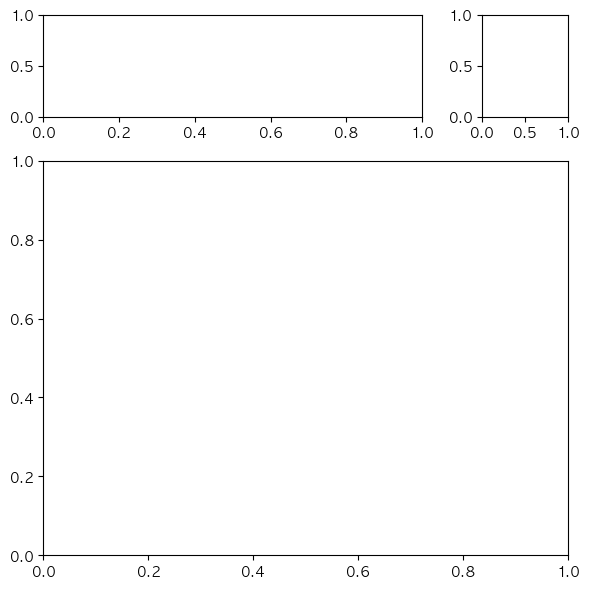

In [29]:
fig=plt.figure(figsize=(6,6), dpi=100)
## 힌트: fig.add_subplot(4, 4, xx)

## 코드작성
ax1=fig.add_subplot(4,4,(1,3))
ax2=fig.add_subplot(4,4,(4,4))
ax3=fig.add_subplot(4,4,(5,16))

fig.tight_layout()

## 실습3

,학년,중간,기말
이름,,,
김둘,1,17,36
김셋,2,17,20
김여섯,2,28,20
김일곱,2,20,44
김여덜,1,20,24


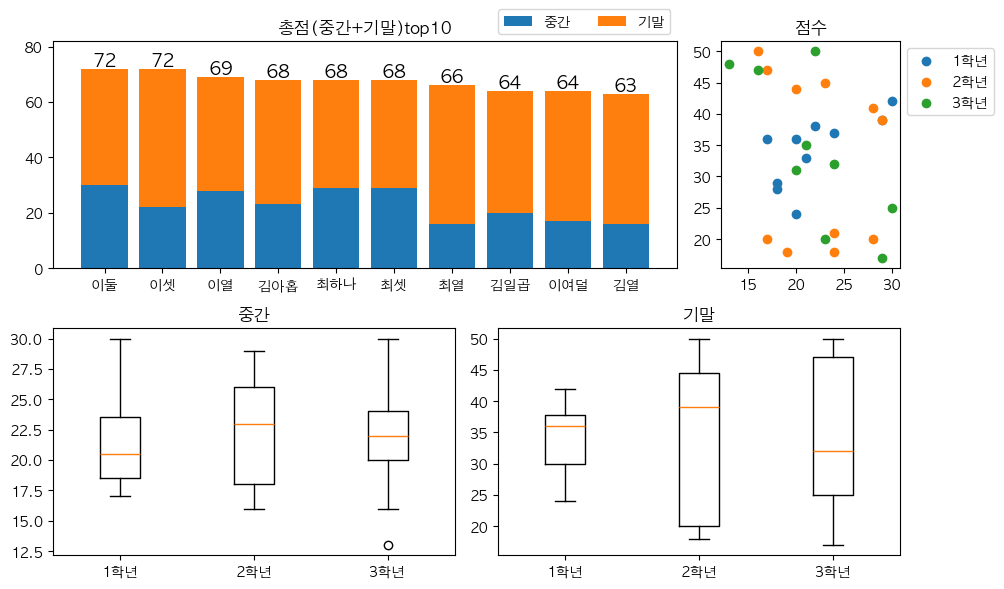

In [ ]:
## read data
df1=pd.read_table('data/13w_d2.txt', sep='\t', index_col=0, encoding='cp949')
df1.head()

fig=plt.figure(figsize=(10,6), dpi=100)

ax1=fig.add_subplot(2,4,(1,3))
ax2=fig.add_subplot(2,4,4)
ax3=fig.add_subplot(2,4,(5,6))
ax4=fig.add_subplot(2,4,(7,8))

## ax1
df1['tot'] = df1['중간']+df1['기말']
df2=df1.sort_values(by='tot',ascending=False).iloc[:10]

_=ax1.bar(df2.index, df2['중간'], label='중간')
_=ax1.bar(df2.index, df2['기말'], bottom=df2['중간'], label='기말')

for i, tot in enumerate(df2['tot']):
    _=ax1.text(i,tot,tot,fontsize=13,ha='center', va='bottom')

_=ax1.set_ylim(0,df2['tot'].max()+10)
_=ax1.set_title('총점(중간+기말)top10')
_=ax1.legend(ncol=2,loc='lower right', bbox_to_anchor=(1,1))

## ax2
for grade in df1['학년'].unique():
    selected_data=df1.loc[df1['학년']==grade]
    _=ax2.scatter(selected_data['중간'], selected_data['기말'],label=f'{grade}학년')

_=ax2.legend(loc='upper left', bbox_to_anchor=(1,1))
_=ax2.set_title('점수')

## ax3
labels=[f"{i}학년" for i in df1['학년'].unique()]
_=ax3.boxplot([df1.loc[df1['학년']==i]['중간'] for i in df1['학년'].unique()], labels=labels)
_=ax3.set_title('중간')

## ax4
_=ax4.boxplot([df1.loc[df1['학년']==i]['기말'] for i in df1['학년'].unique()], labels=labels)
_=ax4.set_title('기말')

fig.tight_layout()

# ==== 실습풀이 ====

## 실습1

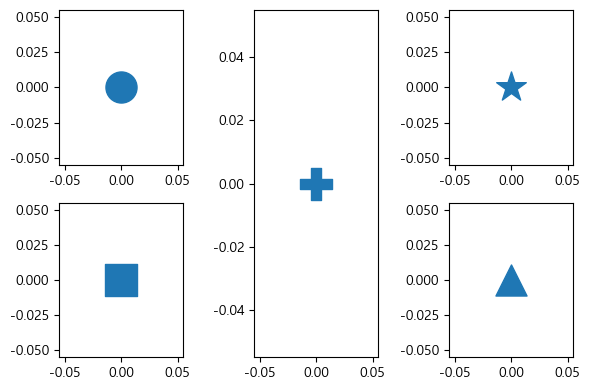

In [22]:
fig=plt.figure(figsize=(6,4), dpi=100)

## 코드작성
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,4)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,6)
ax5=fig.add_subplot(1,3,2)

_=ax1.scatter(0,0,marker='o', s=500)
_=ax2.scatter(0,0,marker='s', s=500)
_=ax3.scatter(0,0,marker='*', s=500)
_=ax4.scatter(0,0,marker='^', s=500)
_=ax5.scatter(0,0,marker='P', s=500)

fig.tight_layout()



## 실습2

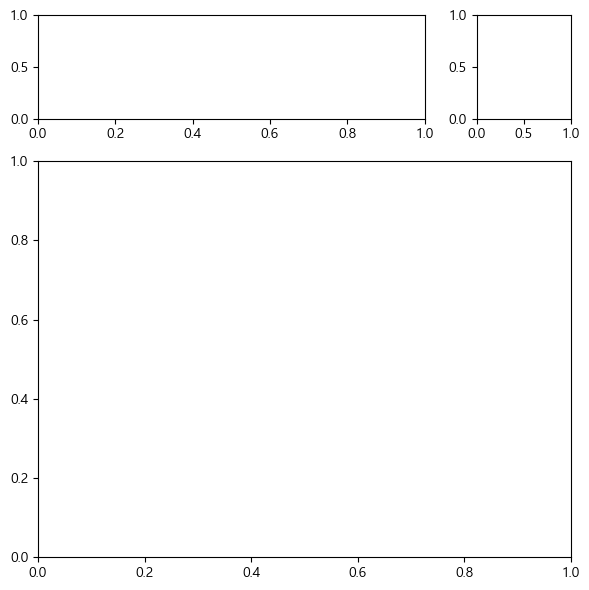

In [24]:
fig=plt.figure(figsize=(6,6), dpi=100)
## 힌트: fig.add_subplot(4, 4, xx)

## 코드작성
ax1=fig.add_subplot(4, 4, (1, 3))
ax1=fig.add_subplot(4, 4, 4)
ax1=fig.add_subplot(4, 4, (5, 16))

fig.tight_layout()

## 실습3

,학년,중간,기말
이름,,,
김둘,1,17,36
김셋,2,17,20
김여섯,2,28,20
김일곱,2,20,44
김여덜,1,20,24


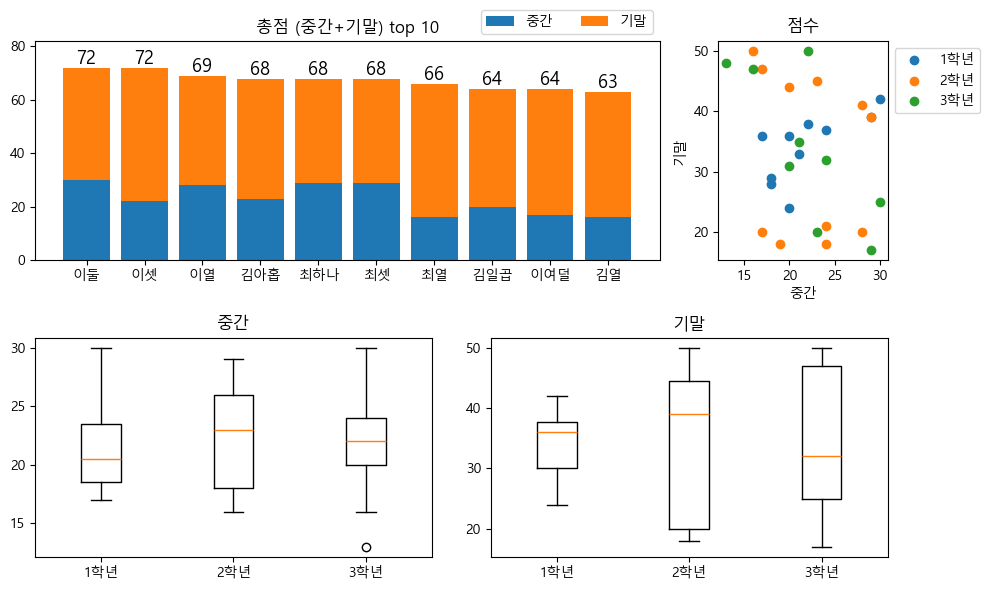

In [46]:
## reat data
df1=pd.read_table('data/13w_d2.txt', sep='\t', index_col=0, encoding='cp949')
df1.head()

fig=plt.figure(figsize=(10,6), dpi=100)

ax1=fig.add_subplot(2,4,(1,3))
ax2=fig.add_subplot(2,4,4)
ax3=fig.add_subplot(2,4,(5,6))
ax4=fig.add_subplot(2,4,(7,8))

## ax1
df1['sum1']=df1['중간']+df1['기말']
df2=df1.sort_values(by='sum1',ascending=False).iloc[:10]

_=ax1.bar(df2.index, df2['중간'], label='중간')
_=ax1.bar(df2.index, df2['기말'], bottom=df2['중간'], label='기말')

for ii, sum1 in enumerate(df2['sum1']):
    _=ax1.text(ii, sum1, sum1, ha='center', va='bottom', fontsize=13)

_=ax1.set_title('총점 (중간+기말) top 10')
_=ax1.set_ylim(0,df2['sum1'].max()+10)

_=ax1.legend(bbox_to_anchor=(1,1), loc='lower right', ncol=2)

## ax2
df1_1=df1.loc[df1['학년']==1]# 1학년 점수 filtering
df1_2=df1.loc[df1['학년']==2]
df1_3=df1.loc[df1['학년']==3]

_=ax2.scatter(df1_1['중간'], df1_1['기말'], label='1학년')
_=ax2.scatter(df1_2['중간'], df1_2['기말'], label='2학년')
_=ax2.scatter(df1_3['중간'], df1_3['기말'], label='3학년')

_=ax2.set_xlabel('중간')
_=ax2.set_ylabel('기말')
_=ax2.set_title('점수')

_=ax2.legend(bbox_to_anchor=(1,1), loc='upper left')

## ax3
_=ax3.boxplot([df1_1['중간'], df1_2['중간'], df1_3['중간']])
_=ax3.set_title('중간')
_=ax3.set_xticks(ax3.get_xticks(),['1학년','2학년','3학년'])

## ax4
_=ax4.boxplot([df1_1['기말'], df1_2['기말'], df1_3['기말']])
_=ax4.set_title('기말')
_=ax4.set_xticks(ax4.get_xticks(),['1학년','2학년','3학년'])

fig.tight_layout()